In [2]:
#https://www.kaggle.com/datasets/washingtongold/wildfire-satellite-data?select=fire_archive_M6_156000.csv
#and


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from tqdm import tqdm
from tqdm import trange
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px

alpha = 95
#must be at least 95% confident

682796
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  41.67200  -87.46883       309.2  0.62   0.54  2019-12-04       700   
1  41.22607  -83.21201       301.1  0.56   0.43  2019-12-04       700   
2  38.83685  -84.23934       314.7  0.39   0.44  2019-12-04       700   
3  39.48581  -84.38905       320.1  0.41   0.45  2019-12-04       700   
4  41.63069  -87.14009       306.1  0.59   0.53  2019-12-04       700   

   satellite instrument confidence version  bright_t31  frp daynight  
0          1      VIIRS          n  2.0NRT       271.7  1.9        N  
1          1      VIIRS          n  2.0NRT       265.8  1.5        N  
2          1      VIIRS          n  2.0NRT       276.0  2.4        N  
3          1      VIIRS          n  2.0NRT       273.2  3.0        N  
4          1      VIIRS          n  2.0NRT       271.1  6.1        N  


In [106]:
calfires = pd.read_csv('2kCalFires.csv')
print(len(calfires))
print(calfires.head())
print(calfires.columns)

1634
   Unnamed: 0  AcresBurned  Active  \
0           0     257314.0   False   
1           1      30274.0   False   
2           2      27531.0   False   
3           3      27440.0   False   
4           4      24251.0   False   

                                           AdminUnit  AirTankers  ArchiveYear  \
0  Stanislaus National Forest/Yosemite National Park         NaN         2013   
1  USFS Angeles National Forest/Los Angeles Count...         NaN         2013   
2  CAL FIRE Riverside Unit / San Bernardino Natio...         NaN         2013   
3                              Tahoe National Forest         NaN         2013   
4                       Ventura County Fire/CAL FIRE         NaN         2013   

   CalFireIncident                           CanonicalUrl  \
0             True         /incidents/2013/8/17/rim-fire/   
1             True  /incidents/2013/5/30/powerhouse-fire/   
2             True    /incidents/2013/7/15/mountain-fire/   
3            False    /incidents/20

In [107]:
datetimes = []
for i in calfires['Started']:
#     print(i)
    #We only want the date
    t = i.split('T')[0]
    datetimes.append(datetime.strptime(t, '%Y-%m-%d'))
    
calfires['Datetime'] = datetimes

In [156]:

df = pd.read_csv('fire_archive_M6_156000.csv')
print(df.head())
print(len(df))

datetimes = []
for i in df['acq_date']:
    #We only want the date
    t = i.split('T')[0]
    datetimes.append(datetime.strptime(t, '%Y-%m-%d'))
    
df['Datetime'] = datetimes

   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   33.1668   -95.4335       301.7   2.0    1.4  2010-09-27       457   
1   33.1694   -95.4404       304.2   2.0    1.4  2010-09-27       457   
2   32.9959  -110.7814       311.7   2.5    1.5  2010-09-27       457   
3   32.9956  -110.7588       304.4   2.5    1.5  2010-09-27       457   
4   33.0014  -110.7551       306.9   2.5    1.5  2010-09-27       457   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          44     6.03       284.6  18.9        N     0  
1     Terra      MODIS          59     6.03       284.5  22.8        N     0  
2     Terra      MODIS          83     6.03       293.9  33.2        N     2  
3     Terra      MODIS          39     6.03       294.3  14.4        N     2  
4     Terra      MODIS          63     6.03       294.7  20.4        N     2  
1182272


In [157]:
from tqdm import trange
locator = geopy.Nominatim(user_agent='timothy', timeout=10)
df['LocationString'] = df['latitude'].map(str) + ',' + df['longitude'].map(str)

drops = []
for i in trange(len(df)):
#     location = locator.reverse(df['LocationString'][i])
#     address = location.address
    if df['Datetime'][i].year < 2013 or df['confidence'][i] < 100:
#     if not " California," in address:
        drops.append(i)
#     else:
#         print(address)
print(len(drops))
# df = df.drop(drops)
# df = df.reset_index(drop=True)
# print("now df is only " + str(len(df)))
# df.head()
# df.to_csv('satellite_fires.csv')





  0%|          | 0/1182272 [00:00<?, ?it/s]



  1%|          | 12589/1182272 [00:00<00:09, 125881.42it/s]



  2%|▏         | 25692/1182272 [00:00<00:09, 127381.88it/s]



  3%|▎         | 38892/1182272 [00:00<00:08, 128731.63it/s]



  4%|▍         | 52238/1182272 [00:00<00:08, 130112.26it/s]



  6%|▌         | 65753/1182272 [00:00<00:08, 131581.81it/s]



  7%|▋         | 79153/1182272 [00:00<00:08, 132296.41it/s]



  8%|▊         | 92670/1182272 [00:00<00:08, 133144.77it/s]



  9%|▉         | 106178/1182272 [00:00<00:08, 133719.15it/s]



 10%|█         | 119626/1182272 [00:00<00:07, 133944.53it/s]



 11%|█▏        | 133082/1182272 [00:01<00:07, 134127.38it/s]



 12%|█▏        | 146638/1182272 [00:01<00:07, 134553.15it/s]



 14%|█▎        | 160198/1182272 [00:01<00:07, 134864.30it/s]



 15%|█▍        | 173512/1182272 [00:01<00:07, 133197.27it/s]



 16%|█▌        | 186976/1182272 [00:01<00:07, 133625.54it/s]



 17%|█▋        | 200258/1182272 [00:01<00:07, 131467.17it/s]

1076033


In [158]:
print(len(df))
df = df.drop(drops)
df = df.reset_index(drop=True)
print("now df is only " + str(len(df)))
df.head()
df.to_csv('satellite_fires2.csv')

1182272
now df is only 106239


In [11]:
def makeGraphs(dataframe):
    years = {}
    months = {}
    
    for i in range(len(dataframe)):
        y = dataframe['Datetime'][i].year
        m = dataframe['Datetime'][i].month
#         print(y)
        if not y in years:
            years[y] = 0
        if not m in months:
            months[m] = 0
            
        years[y] += 1
        months[m] += 1
    
#     plt.bar(years.keys(), years.values(), color='g')
    plt.bar(months.keys(), months.values(), color='g')


# makeGraphs(calfires)

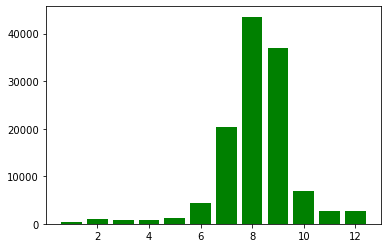

In [121]:
makeGraphs(df)

now df is only 160596


,latitude,longitude,acq_date,satellite,instrument,confidence,year,month,Datetime
0,32.401340,-114.863400,2022-02-04,N,VIIRS,100,2022,2,2022-02-04
1,32.436893,-114.597054,2014-06-15,N,VIIRS,100,2014,6,2014-06-15
2,32.456921,-114.598595,2014-06-15,N,VIIRS,100,2014,6,2014-06-15
3,32.457344,-114.596558,2014-06-15,N,VIIRS,100,2014,6,2014-06-15
4,32.458092,-114.592819,2014-06-15,N,VIIRS,100,2014,6,2014-06-15


In [8]:
FIRMS = pd.read_csv('fire_nrt_J1V-C2_276213.csv')
print(len(FIRMS))
print(FIRMS.head())
# print(FIRMS.describe())
datetimes = []
for i in FIRMS['acq_date']:
    #We only want the date
    t = i.split('T')[0]
    datetimes.append(datetime.strptime(t, '%Y-%m-%d'))
    
FIRMS['Datetime'] = datetimes
print(FIRMS.head())

682796
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  41.67200  -87.46883       309.2  0.62   0.54  2019-12-04       700   
1  41.22607  -83.21201       301.1  0.56   0.43  2019-12-04       700   
2  38.83685  -84.23934       314.7  0.39   0.44  2019-12-04       700   
3  39.48581  -84.38905       320.1  0.41   0.45  2019-12-04       700   
4  41.63069  -87.14009       306.1  0.59   0.53  2019-12-04       700   

   satellite instrument confidence version  bright_t31  frp daynight  
0          1      VIIRS          n  2.0NRT       271.7  1.9        N  
1          1      VIIRS          n  2.0NRT       265.8  1.5        N  
2          1      VIIRS          n  2.0NRT       276.0  2.4        N  
3          1      VIIRS          n  2.0NRT       273.2  3.0        N  
4          1      VIIRS          n  2.0NRT       271.1  6.1        N  
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  41.67200  -87.46883       309.2  0.62   0.54  2019-1

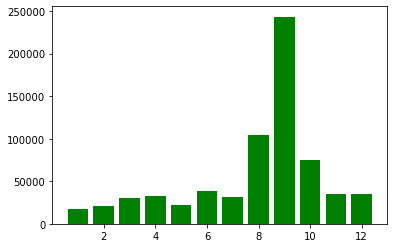

In [12]:
makeGraphs(FIRMS)

In [113]:
# drops = []
# for i in range(len(df)):
# #     if df['confidence'][i] < alpha:
#     if df['Datetime'][i].year < 2013:
#         drops.append(i)
        
# print(len(drops))
# df = df.drop(drops)
# df = df.reset_index(drop=True)
# print("now df is only " + str(len(df)))
# df.head()
# df.to_csv('satexllite_fires.csv')

39138
now df is only 121458
